These plots are binned according to the COS velocity resolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import pandas as pd

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-08-09 16:55:30,388 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-09 16:55:30,390 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-08-09 16:55:30,394 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-09 16:55:30,394 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-08-09 16:55:30,394 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray'+num+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [86]:
def hist_v(ray, ion_, ion_mass, title, dvs, 
           lnst=[(0,(5,1)), (0,(5,1)), 'solid'], 
           colors=['deeppink', 'indigo', 'orangered'],
           alphas = [0.8,0.63,0.77],
           plot=True): # 1D temperature histograms weighted by Ion Mass
    # Do binwidth instead of n_bins
    M = 1.9884099E30
    mass_list = []
    bin_list = []
    
    
    
    for i in range(len(ion_mass)):
        norm_ion_mass = np.array(ray.all_data()[ion_mass[i]])/M
        mass_list.append(norm_ion_mass)
        
    gas_v = np.array(ray.all_data()[('gas', 'velocity_los')])*1.0E-5
    
    dv = np.mean(dvs)
    gas_bin = np.arange(np.min(gas_v),np.max(gas_v)+dv, dv)
    
    if plot==True:
        fig = plt.figure(figsize=(8,6))
        for i in range(len(ion_mass)):
            plt.hist(gas_v, color=colors[i], weights=mass_list[i], log=True, 
                     bins=gas_bin,
                     histtype='step', stacked=True, label=ion_[i], alpha=alphas[i], linewidth=3,
                    ls=lnst[i])
        plt.title(title, fontsize=18)
        plt.xlabel('LOS Velocity [km/s]', fontsize=16)
        plt.xticks(fontsize=14)
#         plt.xscale('log')
#         plt.xlim(5*10**3, 5*10**6)
        plt.ylabel('Ion Mass [M/M$_\odot$]', fontsize=16)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=12)

    return gas_v, mass_list, gas_bin

In [111]:
def hist_O(ray, ion_, ion_mass, title, dvs, 
           lnst=[(0,(5,1)), (0,(5,1)), 'solid'], 
           colors=['deeppink', 'indigo', 'orangered'],
           alphas = [0.8,0.63,0.77],
           plot=True): # 1D temperature histograms weighted by Ion Mass
    # Do binwidth instead of n_bins
    M = 1.9884099E30
    mass_list = []
    bin_list = []
    
    
    
    for i in range(len(ion_mass)):
        norm_ion_mass = np.array(ray.all_data()[ion_mass[i]])/M
        mass_list.append(norm_ion_mass)
        
    gas_v = np.array(ray.all_data()[('gas', 'velocity_los')])*1.0E-5
    
    for i in range(len(dvs)):
        gas_bin = np.arange(np.min(gas_v),np.max(gas_v)+dvs[i], dvs[i])
        bin_list.append(gas_bin)
    
    if plot==True:
        fig = plt.figure(figsize=(8,6))
        for i in range(len(ion_mass)):
            plt.hist(gas_v, color=colors[i], weights=mass_list[i], log=True, 
                     bins=bin_list[i],
                     histtype='step', stacked=True, label=ion_[i], alpha=alphas[i], linewidth=3,
                    ls=lnst[i])
        plt.title(title, fontsize=18)
        plt.xlabel('LOS Velocity [km/s]', fontsize=16)
        plt.xticks(fontsize=14)
#         plt.xscale('log')
#         plt.xlim(5*10**3, 5*10**6)
        plt.ylabel('Ion Mass [M/M$_\odot$]', fontsize=16)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=12)

    return gas_v, mass_list, bin_list

In [129]:
def hist_subplots(data1,data2,labels,el, alphas = [0.8,0.63,0.77],
                 lnst = [(0,(5,1)), (0,(5,1)), 'solid']):
    colors = ['deeppink', 'indigo', 'orangered']
    temp1 = data1[0]
    temp2 = data2[0]
    mass1 = data1[1]
    mass2 = data2[1]
    bin1 = data1[2]
    bin2 = data2[2]
    
    fig = plt.figure(figsize=(17,6))
    p1 = fig.add_subplot(1,2,1)
    for i in range(len(labels)):
        plt.hist(temp1, color=colors[i], weights=mass1[i], 
             log=True, bins=bin1, alpha=alphas[i], histtype='step', 
                 stacked=True, linewidth=3, label=labels[i], ls=lnst[i])
    plt.xlabel('LOS Velocity [km/s]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel('Ion Mass [M/M$_\odot$]', fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(el + ' (Ray 2)', fontsize=18)
    plt.legend(fontsize=12)


    p2 = fig.add_subplot(1,2,2)
    for j in range(len(labels)):
        plt.hist(temp2, color=colors[j], weights=mass2[j], log=True, 
                 bins=bin2, alpha=alphas[j], histtype='step', 
                 stacked=True, linewidth=3, label=labels[j], ls=lnst[j])
    plt.xlabel('LOS Velocity [km/s]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel('Ion Mass [M/M$_\odot$]', fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(el+' (Ray 3)', fontsize=18)
    plt.legend(fontsize=12)
    return p1,p2

In [6]:
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, '2')
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, '3')

yt : [INFO     ] 2022-08-09 16:55:30,739 Getting segment at z = 0.0: [0.5264 0.     0.259 ] unitary to [0.5264 0.5    0.259 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-08-09 16:55:30,743 Getting subsegment: [0.5264 unitary, 0.0 unitary, 0.259 unitary] to [0.5264 unitary, 0.5 unitary, 0.259 unitary].
yt : [INFO     ] 2022-08-09 16:55:31,383 Saving field data to yt dataset: ray2.h5.
yt : [INFO     ] 2022-08-09 16:55:31,467 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-08-09 16:55:31,468 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-08-09 16:55:31,468 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-08-09 16:55:31,468 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt 

In [7]:
trident.add_ion_fields(ray2, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV',
                                  'O I', 'O II', 'O III', 'Al II', 'Al III','Mg II',
                                  'Fe II', 'Fe III'], 
                       ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [INFO     ] 2022-08-09 16:55:32,205 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-09 16:55:32,210 Identified 1.210e+02 octs


In [8]:
trident.add_ion_fields(ray3, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV',
                                  'O I', 'O II', 'O III', 'Al II', 'Al III','Mg II',
                                  'Fe II', 'Fe III'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-08-09 16:55:32,703 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-08-09 16:55:32,706 Identified 1.210e+02 octs


In [9]:
pd.read_csv('IE.csv')

,Elements,Ionization Energy [eV]
0,Al II,5.985386
1,Mg II,7.645748
2,Fe II,7.902783
3,Si II,8.151526
4,C II,11.260818
5,O II,13.617661
6,Fe III,16.188008
7,Si III,16.345546
8,Al III,18.828833
9,C III,24.383065


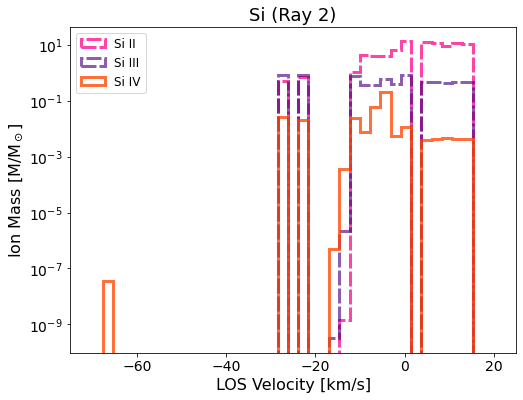

In [88]:
Si_r2 = hist_v(ray2, ['Si II','Si III', 'Si IV'], ['Si_p1_mass', 'Si_p2_mass', 'Si_p3_mass'], 
                 'Si (Ray 2)', dvs=[2.3,2.3,2.3])
plt.xlim(-75,25)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Si_stacked_v.jpg', dpi=800)

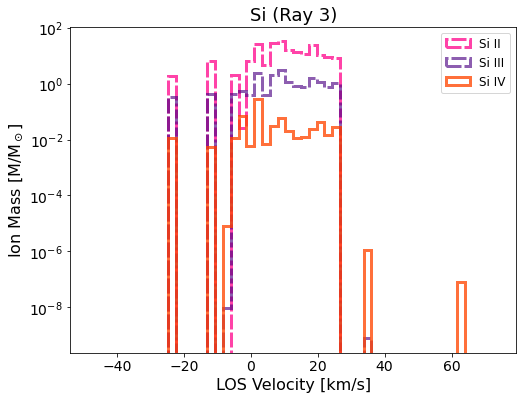

In [89]:
Si_r3 = hist_v(ray3, ['Si II','Si III', 'Si IV'], ['Si_p1_mass', 'Si_p2_mass', 'Si_p3_mass'], 
                  'Si (Ray 3)', dvs=[2.4,2.5,2.1])

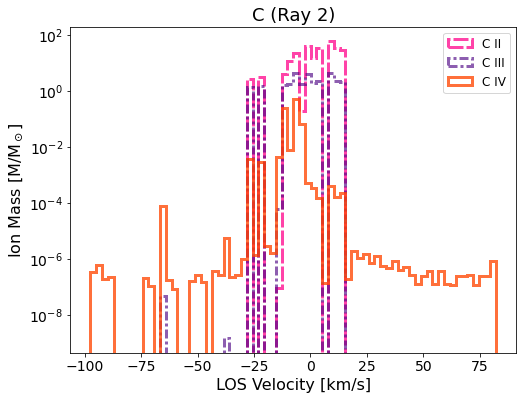

In [84]:
C_r2 = hist_v(ray2, ['C II','C III', 'C IV'], ['C_p1_mass', 'C_p2_mass', 'C_p3_mass'], 
                 'C (Ray 2)', dvs=[2.2,3.1,2.4], lnst=[(0,(5,1)), (0,(3,1,1,1)), 'solid'])


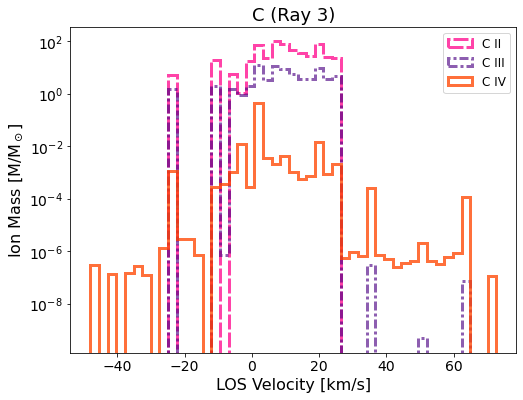

In [85]:
C_r3 = hist_v(ray3, ['C II','C III', 'C IV'], ['C_p1_mass', 'C_p2_mass', 'C_p3_mass'], 
                 'C (Ray 3)',dvs=[2.2,3.1,2.4], lnst=[(0,(5,1)), (0,(3,1,1,1)), 'solid'])

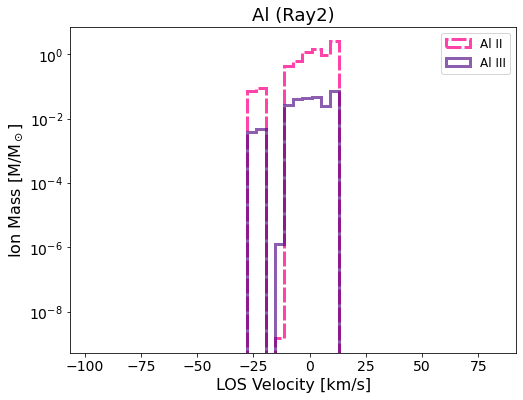

In [106]:
Al_r2 = hist_v(ray2, ['Al II', 'Al III'], ['Al_p1_mass', 'Al_p2_mass'], 'Al (Ray2)',
              dvs=[2.2,6], lnst=[(0,(5,1)),'solid'])

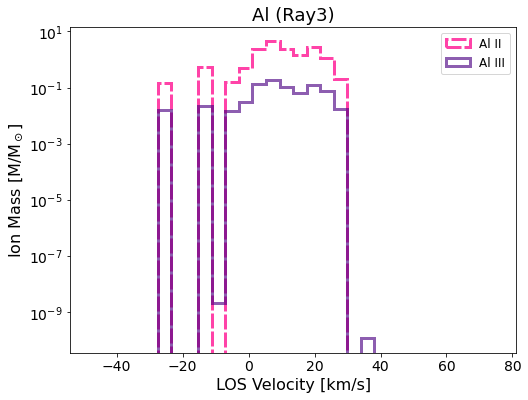

In [107]:
Al_r3 = hist_v(ray3, ['Al II', 'Al III'], ['Al_p1_mass', 'Al_p2_mass'], 'Al (Ray3)',
              dvs=[2.2,6], lnst=[(0,(5,1)),'solid'])

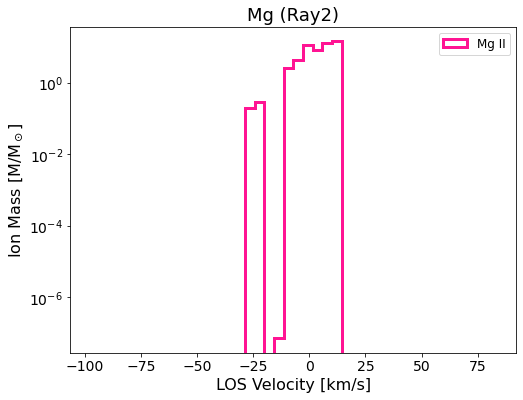

In [99]:
Mg_r2 = hist_v(ray2, ['Mg II'], ['Mg_p1_mass'], 'Mg (Ray2)',
              dvs=[4.3], lnst=['solid'], alphas=[1])

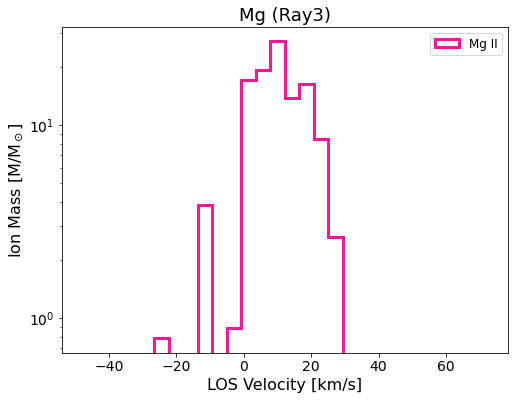

In [98]:
Mg_r3 = hist_v(ray3, ['Mg II'], ['Mg_p1_mass'], 'Mg (Ray3)',
              dvs=[4.3], lnst=['solid'], alphas=[1])

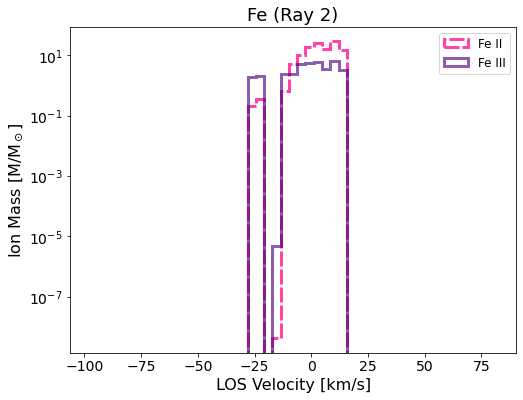

In [104]:
Fe_r2 = hist_v(ray2,['Fe II', 'Fe III'], ['Fe_p1_mass', 'Fe_p2_mass'], 'Fe (Ray 2)',
              dvs=[4.6, 2.7], lnst=[(0,(5,1)), 'solid'])

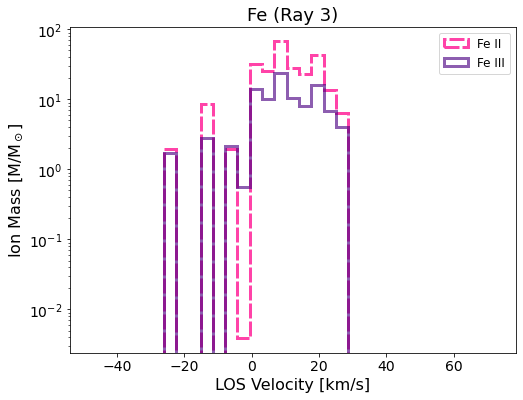

In [105]:
Fe_r3 = hist_v(ray3,['Fe II', 'Fe III'], ['Fe_p1_mass', 'Fe_p2_mass'], 'Fe (Ray 3)',
              dvs=[4.6, 2.7], lnst=[(0,(5,1)), 'solid'])

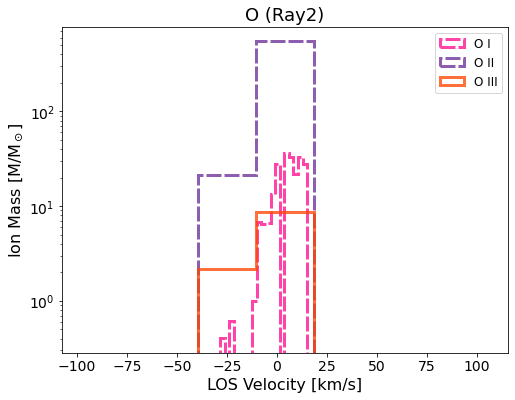

In [112]:
O_r2 = hist_O(ray2, ['O I', 'O II', 'O III'], ['O_p0_mass','O_p1_mass', 'O_p2_mass'],
                'O (Ray2)', dvs=[2.3,29,29])

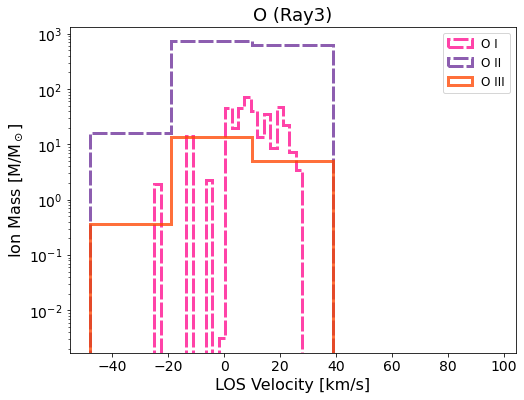

In [113]:
O_r3 = hist_O(ray3, ['O I', 'O II', 'O III'], ['O_p0_mass','O_p1_mass', 'O_p2_mass'],
                'O (Ray3)', dvs=[2.3,29,29])

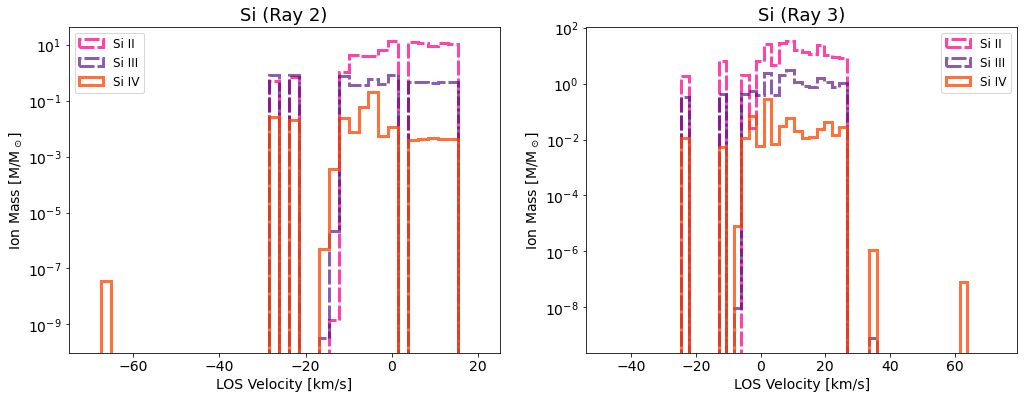

In [134]:
Si = hist_subplots(Si_r2,Si_r3,['Si II', 'Si III', 'Si IV'], 'Si')
Si[0].set_xlim(-75,25)
Si[0].legend(loc='upper left', fontsize=12)

(<AxesSubplot:title={'center':'C (Ray 2)'}, xlabel='LOS Velocity [km/s]', ylabel='Ion Mass [M/M$_\\odot$]'>,
 <AxesSubplot:title={'center':'C (Ray 3)'}, xlabel='LOS Velocity [km/s]', ylabel='Ion Mass [M/M$_\\odot$]'>)

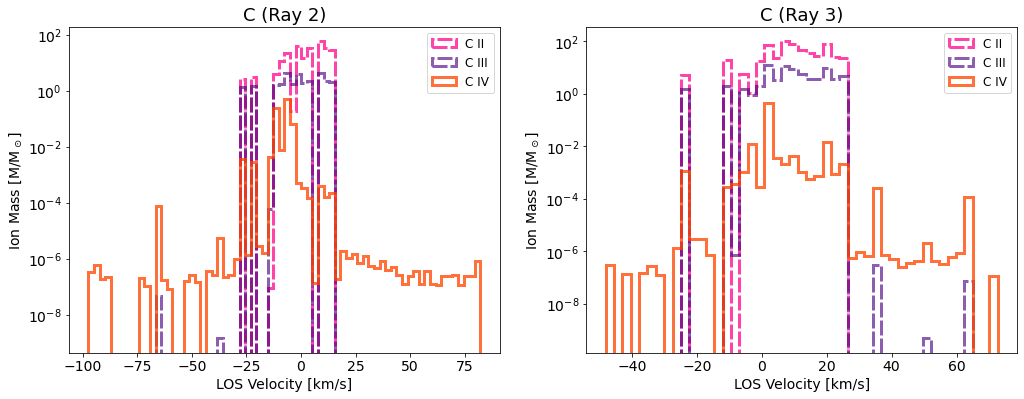

In [135]:
hist_subplots(C_r2,C_r3,['C II', 'C III', 'C IV'], 'C')

(<AxesSubplot:title={'center':'Al (Ray 2)'}, xlabel='LOS Velocity [km/s]', ylabel='Ion Mass [M/M$_\\odot$]'>,
 <AxesSubplot:title={'center':'Al (Ray 3)'}, xlabel='LOS Velocity [km/s]', ylabel='Ion Mass [M/M$_\\odot$]'>)

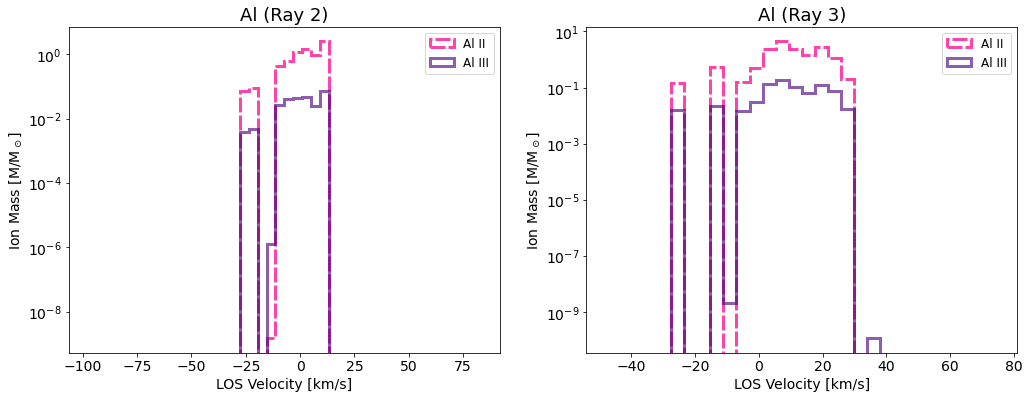

In [136]:
hist_subplots(Al_r2,Al_r3,['Al II', 'Al III'], 'Al', lnst=[(0,(5,1)), 'solid'])

(<AxesSubplot:title={'center':'Mg (Ray 2)'}, xlabel='LOS Velocity [km/s]', ylabel='Ion Mass [M/M$_\\odot$]'>,
 <AxesSubplot:title={'center':'Mg (Ray 3)'}, xlabel='LOS Velocity [km/s]', ylabel='Ion Mass [M/M$_\\odot$]'>)

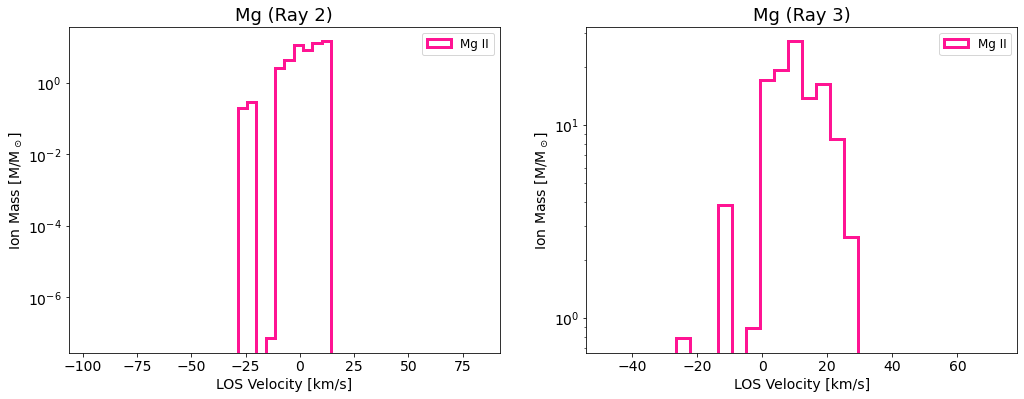

In [139]:
hist_subplots(Mg_r2,Mg_r3,['Mg II'],'Mg', lnst=['solid'], alphas=[1])

(<AxesSubplot:title={'center':'Fe (Ray 2)'}, xlabel='LOS Velocity [km/s]', ylabel='Ion Mass [M/M$_\\odot$]'>,
 <AxesSubplot:title={'center':'Fe (Ray 3)'}, xlabel='LOS Velocity [km/s]', ylabel='Ion Mass [M/M$_\\odot$]'>)

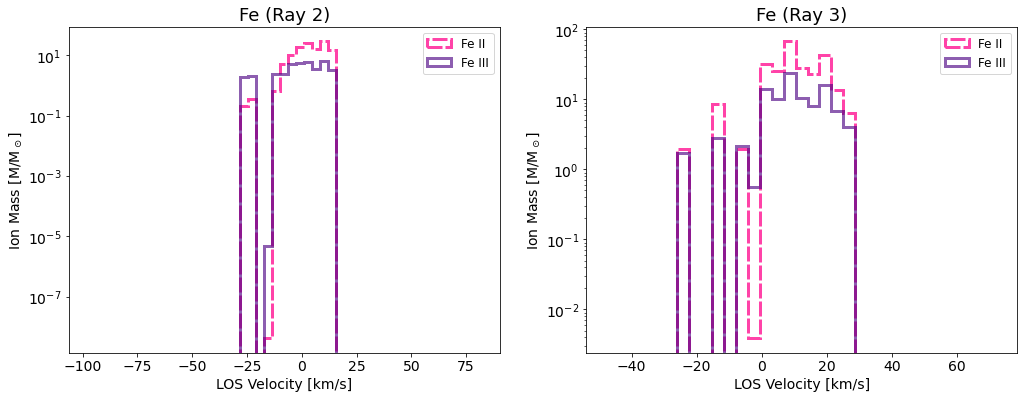

In [140]:
hist_subplots(Fe_r2,Fe_r3,['Fe II', 'Fe III'],'Fe', lnst=[(0,(5,1)), 'solid'])